In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
def padding(image, top_pad, bottom_pad, left_pad, right_pad):
    # Get the dimensions of the input image
    image_height, image_width = image.shape

    # Get new image with padding
    padded_image = np.zeros((image_height + top_pad + bottom_pad, image_width + left_pad + right_pad), dtype=np.uint8)

    # Copy original image to padded image
    padded_image[top_pad:image_height+top_pad, left_pad:image_width+left_pad] = image

    return padded_image

In [3]:
def convolution(image, weighted = False):
    # Get the dimensions of the input image
    image_height, image_width = image.shape

    # whether the average or the weighted average smoothing kernels
    if not weighted:
        kernel = np.ones((3,3), np.float32)/9
    else:
        # Define the size of the Gaussian kernel
        kernel_size = (3, 3)

        # Define the standard deviation for the Gaussian kernel
        sigma = 1.0

        # Get a 2D Gaussian kernel
        kernel = np.zeros(kernel_size)
        for i in range(kernel_size[0]):
            for j in range(kernel_size[1]):
                x, y = i - kernel_size[0] // 2, j - kernel_size[1] // 2
                kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
        kernel /= np.sum(kernel)

    # image padding
    padded_image = padding(image,1,1,1,1)

    # Initialize the output image
    convolution_image = np.zeros((image_height, image_width), dtype=np.uint8)

    # Loop over the pixels in the input image
    for i in range(1, image_height+1):
        for j in range(1, image_width+1):
            
            # Compute the sum of element-wise multiplication of kernel and image sub-region
            sub_region = padded_image[i-1:i+2, j-1:j+2]
            pixel_sum = np.sum(np.multiply(sub_region, kernel))

            # Set the output pixel value
            convolution_image[i-1, j-1] = np.uint8(pixel_sum)

    return convolution_image

In [4]:
def gradient(image):
    # Define the Sobel operator kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Pad the image with zeros to deal with edges
    padded_image = padding(image,1,1,1,1)

    # Compute the horizontal gradient using convolution_image
    gradientX = np.zeros_like(image, dtype=np.float32)
    for i in range(1, image.shape[0]+1):
        for j in range(1, image.shape[1]+1):
            sub_region = padded_image[i-1:i+2, j-1:j+2]
            pixel_sum = np.sum(np.multiply(sub_region, sobel_x))
            gradientX[i-1, j-1] = pixel_sum

    # Compute the vertical gradient using convolution_image
    gradientY = np.zeros_like(image, dtype=np.float32)
    for i in range(1, image.shape[0]+1):
        for j in range(1, image.shape[1]+1):
            sub_region = padded_image[i-1:i+2, j-1:j+2]
            pixel_sum = np.sum(np.multiply(sub_region, sobel_y))
            gradientY[i-1, j-1] = pixel_sum

    # Compute the gradient magnitude
    gradientMagn = np.sqrt(gradientX**2 + gradientY**2)

    return gradientX, gradientY, gradientMagn

In [5]:
def thresholding(image, threshold_value):
    # Create an output image array of the same shape as the input image
    threshold_image = np.zeros_like(image)

    # Iterate over each pixel and set the pixel value based on the threshold
    for i in range(threshold_image.shape[0]):
        for j in range(threshold_image.shape[1]):
            if image[i,j] >= threshold_value:
                threshold_image[i,j] = 255
            else:
                threshold_image[i,j] = 0

    return threshold_image

In [6]:
# Load input image
input_image = cv2.imread("./kitty.bmp", cv2.IMREAD_GRAYSCALE)

# Perform convolution
convolution_image = convolution(input_image, False)

# Perform convolution
grad_x, grad_y, grad_mag = gradient(convolution_image)

# Set the threshold value
threshold_value = 100
threshold_image = thresholding(grad_mag, threshold_value)

# Show the output image
# cv2.imwrite('image.jpg', threshold_image)
cv2.imshow("image",input_image)
cv2.imshow("convolution_image",convolution_image)
cv2.imshow("grad_x",grad_x)
cv2.imshow("grad_y",grad_y)
cv2.imshow("grad_mag",grad_mag)
cv2.imshow("threshold_image",threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

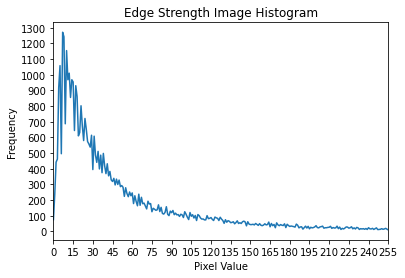

In [117]:
# Plot the histogram
histogram, bin_edges2 = np.histogram(grad_mag, bins=256, range=[0, 256])
plt.plot(histogram)
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Edge Strength Image Histogram')
x_major_locator=MultipleLocator(15)
y_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,255)
plt.show()

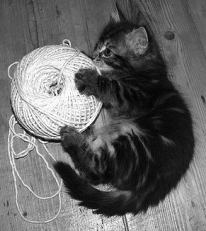

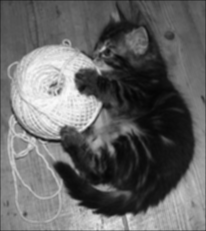

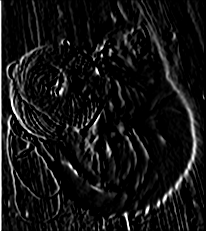

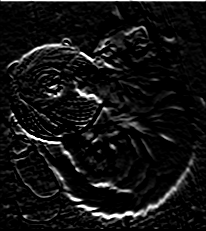

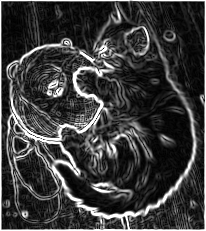

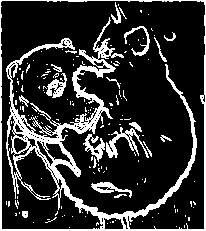

In [104]:
# Load input image
input_image2 = cv2.imread("./kitty.bmp", cv2.IMREAD_GRAYSCALE)

# Perform convolution
convolution_image2 = convolution(input_image, True)

# Perform convolution
grad_x2, grad_y2, grad_mag2 = gradient(convolution_image2)

# Set the threshold value
threshold_value2 = 100
threshold_image2 = thresholding(grad_mag2, threshold_value2)

# Show the output image
cv2_imshow(input_image2)
cv2_imshow(convolution_image2)
cv2_imshow(grad_x2)
cv2_imshow(grad_y2)
cv2_imshow(grad_mag2)
cv2_imshow(threshold_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

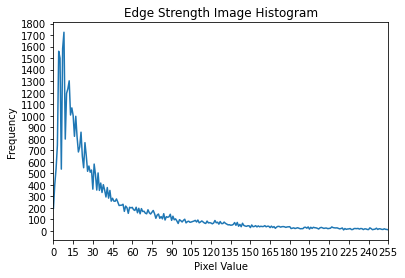

In [116]:
# Plot the histogram
histogram2, bin_edges2 = np.histogram(grad_mag2, bins=256, range=[0, 256])
plt.plot(histogram2)
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Edge Strength Image Histogram')
x_major_locator=MultipleLocator(15)
y_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,255)
plt.show()

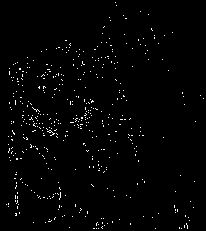

In [107]:
image_height, image_width = threshold_image.shape

diff = np.zeros((image_height, image_width), dtype=np.uint8)

for i in range(image_height):
    for j in range(image_width):
        diff[i][j] = threshold_image2[i][j]-threshold_image[i][j]


cv2_imshow(diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [77]:
def different(image1, image2):
    image_height, image_width = threshold_image.shape

    for i in range(image_height):
        for j in range(image_width):
            if image1[i][j] != image2[i][j]:
                print("diff!")
                break


task6

In [90]:
def convolution2(image, kernel):
    # Get the dimensions of the input image and kernel
    image_height, image_width = image.shape

    N = kernel.shape[0]-1
    P = N//2

    # padded_image = padding(image,2,2,2,2)
    padded_image = padding(image,P,P,P,P)


    # Initialize the output image
    output_image = np.zeros((image_height, image_width), dtype=np.uint8)

    # Loop over the pixels in the input image
    for i in range(1, image_height+1):
        for j in range(1, image_width+1):
            
            # Compute the sum of element-wise multiplication of kernel and image sub-region
            sub_region = padded_image[i-1:i+N, j-1:j+N]
            # print(sub_region)
            pixel_sum = np.sum(np.multiply(sub_region, kernel))

            # Set the output pixel value
            output_image[i-1, j-1] = np.uint8(pixel_sum)

    return output_image

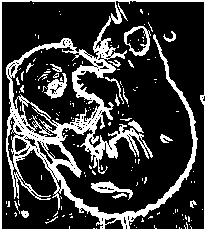

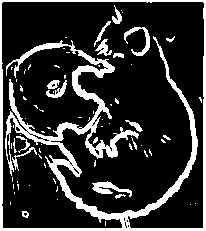

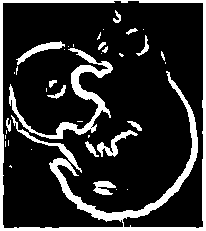

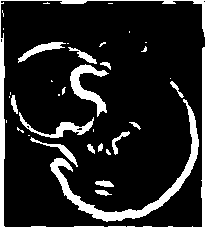

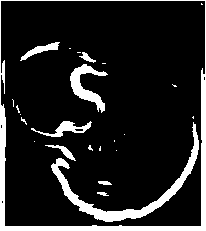

In [108]:
arr = [3,5,7,9,11]

# Load input image
input_image3 = cv2.imread("./kitty.bmp", cv2.IMREAD_GRAYSCALE)

for i in arr:
    # kernel
    kernel = np.ones((i,i), np.float32)/(i*i)

    # Perform convolution
    convolution_image3 = convolution2(input_image3, kernel)

    # Perform convolution
    grad_x3, grad_y3, grad_mag3 = gradient(convolution_image3)

    # Set the threshold value
    threshold_value3 = 80

    threshold_image3 = thresholding(grad_mag3, threshold_value3)

    # Show the output image
    # cv2_imshow(input_image3)
    # cv2_imshow(convolution_image3)
    # cv2_imshow(grad_x3)
    # cv2_imshow(grad_y3)
    # cv2_imshow(grad_mag3.astype(np.uint8))
    cv2_imshow(threshold_image3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

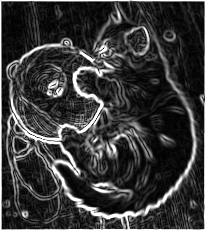

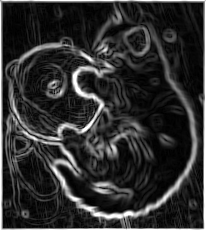

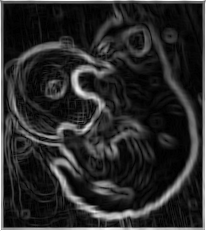

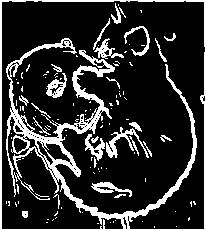

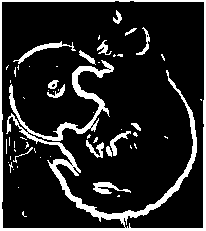

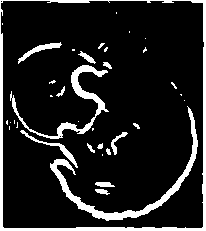

In [109]:
# Load input image
input_image3 = cv2.imread("./kitty.bmp", cv2.IMREAD_GRAYSCALE)

# kernel
kernel1 = np.ones((3,3), np.float32)/9
kernel2 = np.ones((5,5), np.float32)/25
kernel3 = np.ones((7,7), np.float32)/49

# Perform convolution
convolution_image1 = convolution2(input_image3, kernel1)
convolution_image2 = convolution2(input_image3, kernel2)
convolution_image3 = convolution2(input_image3, kernel3)

# Perform convolution
grad_x1, grad_y1, grad_mag1 = gradient(convolution_image1)
grad_x2, grad_y2, grad_mag2 = gradient(convolution_image2)
grad_x3, grad_y3, grad_mag3 = gradient(convolution_image3)

# # Set the threshold value
threshold_value3 = 100

threshold_image1 = thresholding(grad_mag1, threshold_value3)
threshold_image2 = thresholding(grad_mag2, threshold_value3)
threshold_image3 = thresholding(grad_mag3, threshold_value3)

# different(threshold_image1, threshold_image2)
# different(threshold_image2, threshold_image3)
# different(threshold_image1, threshold_image3)


# Show the output image
# cv2_imshow(input_image3)
# cv2_imshow(convolution_image1)
# cv2_imshow(convolution_image2)
# cv2_imshow(convolution_image3)
# cv2_imshow(grad_x3)
# cv2_imshow(grad_y3)
# cv2_imshow(grad_mag3.astype(np.uint8))
cv2_imshow(grad_mag1)
cv2_imshow(grad_mag2)
cv2_imshow(grad_mag3)

cv2_imshow(threshold_image1)
cv2_imshow(threshold_image2)
cv2_imshow(threshold_image3)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot the histogram
# histogram3 = cv2.calcHist([grad_mag3.astype(np.uint8)], [0], None, [256], [0, 256])
# plt.plot(histogram3)
# plt.xlim([0, 256])
# plt.xlabel('Pixel Value')
# plt.ylabel('Frequency')
# plt.title('Edge Strength Image Histogram')
# x_major_locator=MultipleLocator(15)
# y_major_locator=MultipleLocator(50)
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
# plt.xlim(0,255)
# plt.ylim(0,900)
# plt.show()

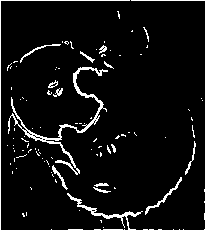

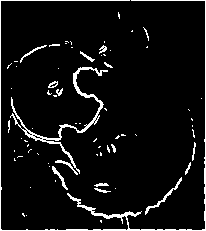

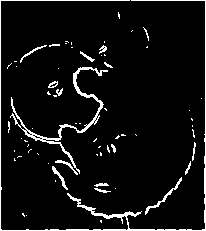

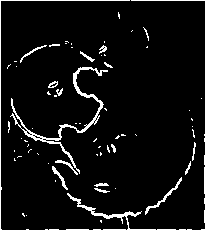

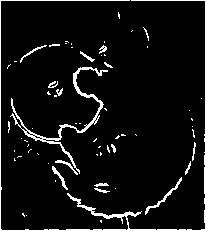

In [96]:
import cv2
import numpy as np

# Load the input image
image = cv2.imread("./kitty.bmp", cv2.IMREAD_GRAYSCALE)

# Define the size of the Gaussian kernel
kernel_size = (3, 3)

arr = [1.0,2.0,3.0,4.0,5.0]

for sigma in arr:
    # Define the standard deviation for the Gaussian kernel
    # sigma = 3.0

    # Create a 2D Gaussian kernel
    kernel = np.zeros(kernel_size)
    for i in range(kernel_size[0]):
        for j in range(kernel_size[1]):
            x, y = i - kernel_size[0] // 2, j - kernel_size[1] // 2
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)
    # print(kernel)

    # Perform convolution
    convolution_image3 = convolution2(input_image3, kernel)

    # Perform convolution
    grad_x3, grad_y3, grad_mag3 = gradient(convolution_image3)

    # Set the threshold value
    threshold_value3 = 200

    threshold_image3 = thresholding(grad_mag3, threshold_value3)

    # Show the output image
    # cv2_imshow(image)
    # cv2_imshow(convolution_image3)
    # cv2_imshow(grad_x3)
    # cv2_imshow(grad_y3)
    # cv2_imshow(grad_mag3.astype(np.uint8))
    cv2_imshow(threshold_image3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
